In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import xgboost as xgb

In [2]:
data = pd.read_csv('../data/data_numerical.csv')

In [3]:
data.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,target,Career_Length,Stay_Length,GS,Inn,playerid,G,Team,Season,Leave
0,0,0,0,1,97.080000,2.680000,1.880000,13,4,2,0,765.2,1,266,13,2007,0.0
1,0,0,0,1,118.173913,3.304348,2.000000,13,5,3,0,655.2,1,375,13,2008,0.0
2,0,0,0,1,112.086957,2.086957,1.434783,13,3,1,0,656.0,1,264,13,2006,0.0
3,0,0,0,1,103.666667,1.703704,1.666667,0,1,1,0,287.1,1,74,0,2003,0.0
4,0,0,0,1,105.958333,2.958333,2.041667,30,6,4,0,81.1,1,27,13,2009,1.0


In [4]:
X = data.drop(['Leave', 'playerid', 'target'], axis=1)
X.drop(data[data.Season==2017].index, inplace=True)
y = data['Leave']
y.drop(data[data.Season==2017].index, inplace=True)
u = data['target']
u.drop(data[data.Season==2017].index, inplace=True)

In [5]:
X.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Career_Length,Stay_Length,GS,Inn,G,Team,Season
0,0,0,0,1,97.080000,2.680000,1.880000,4,2,0,765.2,266,13,2007
1,0,0,0,1,118.173913,3.304348,2.000000,5,3,0,655.2,375,13,2008
2,0,0,0,1,112.086957,2.086957,1.434783,3,1,0,656.0,264,13,2006
3,0,0,0,1,103.666667,1.703704,1.666667,1,1,0,287.1,74,0,2003
4,0,0,0,1,105.958333,2.958333,2.041667,6,4,0,81.1,27,13,2009


In [6]:
train_mask = (X.Season > 2006)&(X.Season < 2015)
test_mask = (X.Season >= 2015)
X_train = X[train_mask]
X_test = X[test_mask]
y_train =y[train_mask]
y_test = y[test_mask]
u_train = u[train_mask]
u_test = u[test_mask]


In [7]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
accuracy_score(y_test, xmodel.predict(X_test))

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.6969057665260197

In [9]:
leave_predictions_train = xmodel.predict(X_train)
leave_predictions_test = xmodel.predict(X_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [10]:
#xmodel.predict(X_test)

In [11]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
accuracy_score(y_test, et.predict(X_test))

0.6441631504922645

# Multi model stuff

In [13]:
#data_multi = pd.read_csv('../data/hayden_cleaned_data.csv')

In [14]:
#team_names = data_multi.target.unique()
#id_team = {names:i for i,names in enumerate (team_names)}
#data_multi.target = data_multi.target.apply(lambda x : id_team[x])

In [15]:
#X = data.drop(['Leave', 'playerid','Team'], axis=1)
#X.drop(data[data.Season==2017].index, inplace=True)
#u = data['Team']
#u.drop(data[data.Season==2017].index, inplace=True)

In [16]:
X_train['Leave_pred'] = leave_predictions_train
X_test['Leave_pred'] = leave_predictions_test


In [17]:
X_train.head()

,RP,C,SP,FD,Avg_Team_G,Avg_Team_Career_Length,Avg_Team_Stay_Length,Career_Length,Stay_Length,GS,Inn,G,Team,Season,Leave_pred
0,0,0,0,1,97.080000,2.680000,1.880000,4,2,0,765.2,266,13,2007,0.0
1,0,0,0,1,118.173913,3.304348,2.000000,5,3,0,655.2,375,13,2008,0.0
4,0,0,0,1,105.958333,2.958333,2.041667,6,4,0,81.1,27,13,2009,1.0
8,0,0,0,1,107.071429,4.500000,3.285714,7,7,0,689.1,145,0,2008,0.0
9,0,0,0,1,104.708333,3.708333,3.000000,6,6,0,724.1,108,0,2007,0.0


In [18]:
#from keras.utils import np_utils

In [19]:
#mask_retire = (data.target == 0)
#data_noretire = data[~mask_retire]
#mask_gs = (data.G >= 1)
#data_noretire = (data[mask_gs])
#mask_length = (data_leave.Stay_Length >= 2)
#data_noretire = (data_leave[mask_length])
#data_noretire

In [20]:
#X = data[['SP','RP','FD','C','Stay_Length', 'Career_Length', 'GS', 'G', 'Inn']]#list(p.Team.unique())+


#y = data[['Diamondbacks','Royals','Dodgers','Phillies','Brewers','Cubs','Tigers','Giants','Red Sox','Indians','Twins','Blue Jays','White Sox','Padres','Cardinals','Mets','Braves','Expos','Rockies','Marlins','Astros','Nationals','Yankees','Mariners','Angels','Athletics','Reds','Pirates','Rays','Orioles','Rangers','Devil Rays']]
#y = np_utils.to_categorical(data_noretire.target,33)
#u = data_noretire.target 

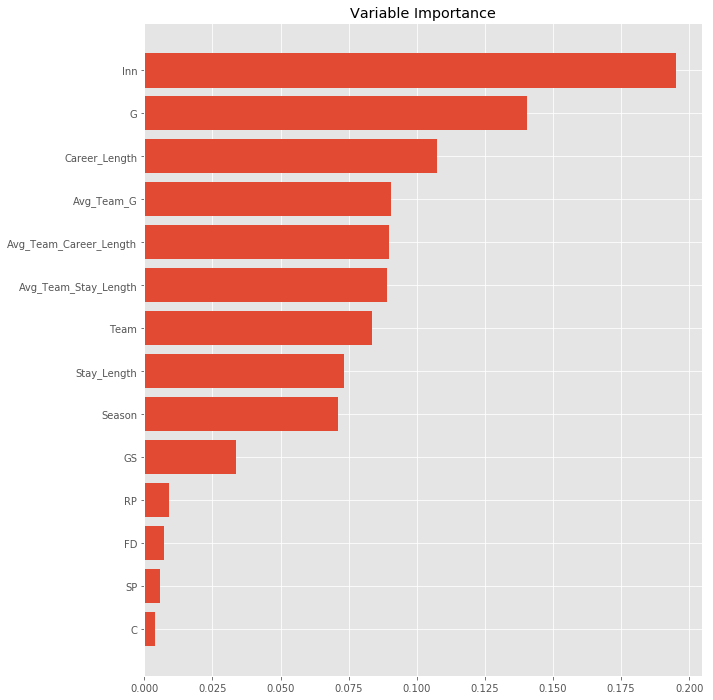

In [21]:
ind = np.argsort(et.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(et.feature_importances_)),et.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(et.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [22]:
et = ExtraTreesClassifier()
et.fit(X_train, u_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
et.score(X_test, u_test)

0.35443037974683544

In [24]:
xmodel = xgb.XGBClassifier()
xmodel.fit(X_train, u_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [25]:
xmodel.score(X_test, u_test)

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.590014064697609

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train, u_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
logreg.score(X_test, u_test)

0.29254571026722925

In [28]:
rf = RandomForestClassifier()
rf.fit(X_train, u_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rf.score(X_test, u_test)

0.29324894514767935

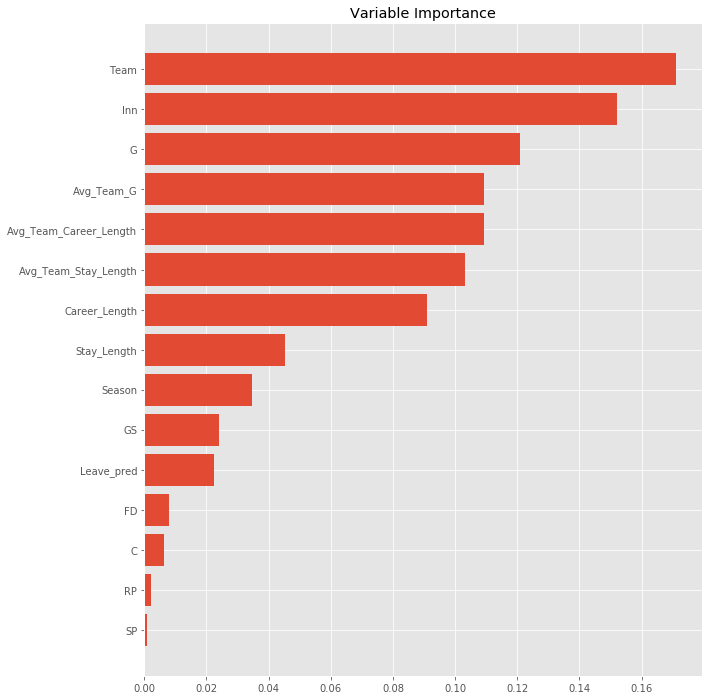

In [30]:
ind = np.argsort(xmodel.feature_importances_)
plt.figure(figsize=(10,12))

plt.barh(range(len(xmodel.feature_importances_)),xmodel.feature_importances_[ind])
# It is very important that you use the same columns that you fit your model with, or else this will be wrong!
plt.yticks(range(len(xmodel.feature_importances_)),X_train.columns[ind])
plt.title("Variable Importance")
plt.show()

In [31]:
Counter(xmodel.predict(X_test))

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Counter({0: 35,
         1: 28,
         2: 27,
         3: 38,
         4: 18,
         5: 34,
         6: 43,
         7: 21,
         8: 36,
         9: 47,
         10: 31,
         11: 37,
         12: 20,
         13: 12,
         14: 31,
         15: 39,
         16: 37,
         17: 36,
         18: 3,
         19: 30,
         20: 31,
         21: 34,
         22: 28,
         23: 32,
         24: 36,
         25: 34,
         26: 37,
         27: 36,
         28: 31,
         29: 35,
         30: 485})

/home/mtmoncur/.virtualenvs/general/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


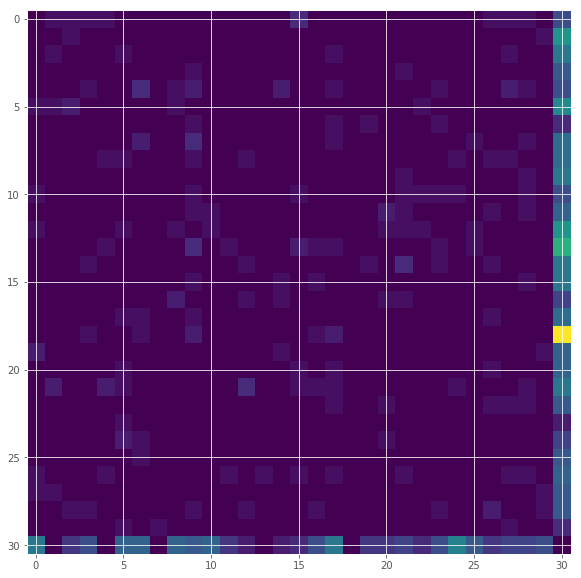

In [32]:
plt.figure(figsize=(10,10))
conf_mat = confusion_matrix(u_test, xmodel.predict(X_test))
ind = np.diag_indices(len(conf_mat))
conf_mat[ind] = 0
plt.imshow(conf_mat)